# Taller Modelos de Predicción

## Modelos sin Año y Mes

### Exploramos el dataset

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lecura
ruta = '../semana_5/turistas_cartagena_data.csv'
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(500, 10)


,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
0,1982-12,126958.0,27.6,195.4,0.0,252889.0,3076.77,0.0,74.0,88.0
1,1983-01,136932.0,27.6,248.9,0.0,268933.0,3231.50,1.0,103.0,98.4
2,1983-02,108694.0,30.7,61.9,1.0,113428.0,3478.34,0.0,205.0,72.0
3,1983-03,124879.0,31.6,3.3,0.0,275006.0,3925.80,0.0,122.0,63.9
4,1983-04,115268.0,31.9,41.1,0.0,346627.0,3400.98,0.0,169.0,89.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Fecha                                      495 non-null    object 
 1   Número de Visitantes                       485 non-null    float64
 2   Temperatura Media (°C)                     495 non-null    float64
 3   Precipitación (mm)                         495 non-null    float64
 4   Eventos Especiales                         495 non-null    float64
 5   Costo Promedio de Alojamiento (COP)        495 non-null    float64
 6   Tasa de Cambio (USD/COP)                   495 non-null    float64
 7   Promociones de Turismo                     495 non-null    float64
 8   Cantidad de Vuelos y Cruceros Disponibles  495 non-null    float64
 9   Ocupación Hotelera (%)                     495 non-null    float64
dtypes: float64(9), object(1)
m

### Limpieza de datos

#### Datos Faltantes

In [5]:
# Imprimir registros con valores nulos a lo ancho
print(data[data.isnull().any(axis=1)])

       Fecha  Número de Visitantes  Temperatura Media (°C)  \
6        NaN                   NaN                     NaN   
7        NaN                   NaN                     NaN   
8        NaN                   NaN                     NaN   
9        NaN                   NaN                     NaN   
10       NaN                   NaN                     NaN   
12   1983-12                   NaN                    25.8   
52   1987-03                   NaN                    28.2   
57   1987-08                   NaN                    31.9   
71   1988-10                   NaN                    31.1   
114  1992-04                   NaN                    25.9   
125  1993-03                   NaN                    28.1   
140  1994-06                   NaN                    28.4   
327  2009-10                   NaN                    30.7   
377  2013-11                   NaN                    27.3   
379  2014-01                   NaN                    25.0   

     Pr

In [6]:
# Ver valores nulos
print(data.isnull().sum())

Fecha                                         5
Número de Visitantes                         15
Temperatura Media (°C)                        5
Precipitación (mm)                            5
Eventos Especiales                            5
Costo Promedio de Alojamiento (COP)           5
Tasa de Cambio (USD/COP)                      5
Promociones de Turismo                        5
Cantidad de Vuelos y Cruceros Disponibles     5
Ocupación Hotelera (%)                        5
dtype: int64


In [7]:
# Eliminar las filas completamente vacías
print(f'El tamaño del dataset antes de eliminar las filas vacías {data.shape}')
data.dropna(how='all', inplace=True)
print(f'El tamaño del dataset despues de eliminar las filas vacías {data.shape}')

El tamaño del dataset antes de eliminar las filas vacías (500, 10)
El tamaño del dataset despues de eliminar las filas vacías (495, 10)


In [8]:
# Rellenar 'Número de Visitantes' con la media
data['Número de Visitantes'] = data['Número de Visitantes'].fillna(data['Número de Visitantes'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Fecha                                      495 non-null    object 
 1   Número de Visitantes                       495 non-null    float64
 2   Temperatura Media (°C)                     495 non-null    float64
 3   Precipitación (mm)                         495 non-null    float64
 4   Eventos Especiales                         495 non-null    float64
 5   Costo Promedio de Alojamiento (COP)        495 non-null    float64
 6   Tasa de Cambio (USD/COP)                   495 non-null    float64
 7   Promociones de Turismo                     495 non-null    float64
 8   Cantidad de Vuelos y Cruceros Disponibles  495 non-null    float64
 9   Ocupación Hotelera (%)                     495 non-null    float64
dtypes: float64(9), object(1)
memory

#### Eliminar duplicados

In [9]:
# Identificar filas duplicadas
data[data.duplicated()]

,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)


In [10]:
# Eliminar duplicados
data.drop_duplicates(inplace=True)

#### Verificar Columnas númericas

In [11]:
data.describe()

,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,79213.288660,28.427475,152.168485,0.187879,291329.464646,3228.464101,0.303030,177.006061,74.231717
std,42462.184309,2.038817,89.958267,0.391011,111495.245496,433.057422,0.460033,70.255966,14.271801
min,5769.000000,25.000000,-50.000000,0.000000,100781.000000,2500.200000,0.000000,50.000000,50.000000
25%,42284.500000,26.600000,70.000000,0.000000,196031.500000,2903.380000,0.000000,113.000000,61.850000
50%,81213.000000,28.400000,154.700000,0.000000,286987.000000,3214.660000,0.000000,181.000000,73.000000
75%,116688.000000,30.200000,230.800000,0.000000,383196.500000,3589.860000,1.000000,235.000000,87.050000
max,149572.000000,32.000000,299.400000,1.000000,499845.000000,3996.730000,1.000000,299.000000,100.000000


#### Outliers en variables numéricas

Usamos gráficos de boxplots para identificar datos atípicos:

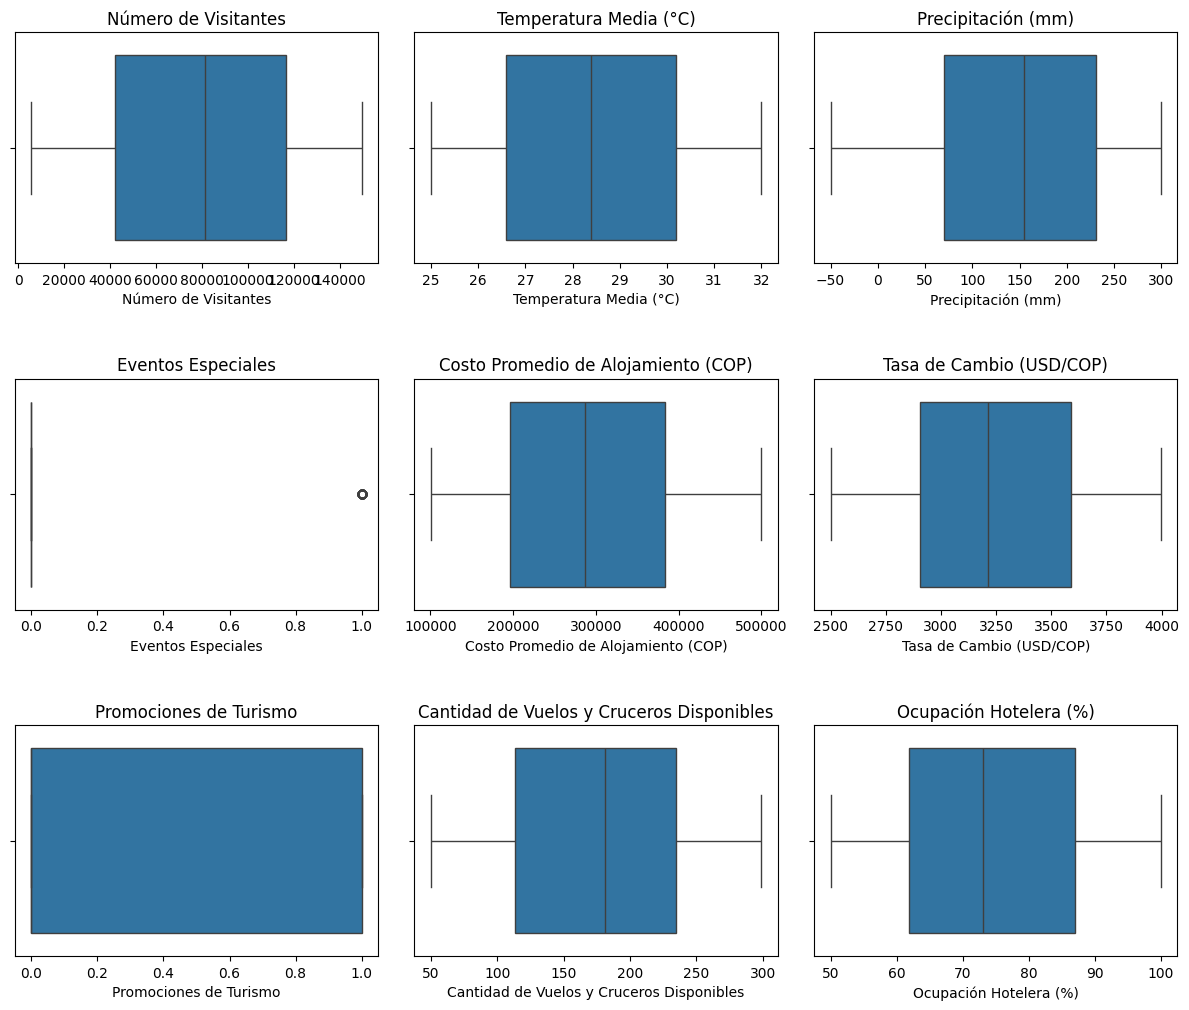

In [12]:
# Seleccionamos solo las columnas numericas
cols_num = data.select_dtypes(exclude='object').columns 

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

# Aplanar la matriz de ejes para un acceso más fácil
ax = ax.flatten()

# Graficamos un boxplot por cada una de las columnas
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

plt.show()

Observaciones:
- `Precipitación mm` tiene valores por debajo de 0 mm

Una precipitación negativa no tiene sentido, así que hay que corregir estos valores:

In [13]:
# Reemplzar los valores de precipitacion menores de 0 por la media
# Calcular el promedio solo con valores no negativos
mean_value = data.loc[data['Precipitación (mm)'] >= 0, 'Precipitación (mm)'].mean()

# Reemplazar los valores menores a 0 por el promedio corregido
data.loc[data['Precipitación (mm)'] < 0, 'Precipitación (mm)'] = mean_value

Guardamos el dataset limpio en un nuevo  archivo .csv:

In [14]:
ruta = '../semana_5/turistas_cartagena_data_clean.csv'
data.to_csv(ruta)

### Modelo de regresión (predecir visitantes)

In [15]:
RANDOM = 42

In [16]:
data.describe().loc[['max', 'min']]

,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
max,149572.0,32.0,299.4,1.0,499845.0,3996.73,1.0,299.0,100.0
min,5769.0,25.0,1.5,0.0,100781.0,2500.20,0.0,50.0,50.0


#### Dividir el conjunto de datos en entrenamiento y prueba

In [17]:
data.head()

,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%)
0,1982-12,126958.0,27.6,195.4,0.0,252889.0,3076.77,0.0,74.0,88.0
1,1983-01,136932.0,27.6,248.9,0.0,268933.0,3231.50,1.0,103.0,98.4
2,1983-02,108694.0,30.7,61.9,1.0,113428.0,3478.34,0.0,205.0,72.0
3,1983-03,124879.0,31.6,3.3,0.0,275006.0,3925.80,0.0,122.0,63.9
4,1983-04,115268.0,31.9,41.1,0.0,346627.0,3400.98,0.0,169.0,89.9


In [18]:
# Convertir 'Fecha' a tipo datetime y crear nuevas columnas
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y-%m')
data['Año'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month

In [19]:
data.columns

Index(['Fecha', 'Número de Visitantes', 'Temperatura Media (°C)',
       'Precipitación (mm)', 'Eventos Especiales',
       'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
       'Promociones de Turismo', 'Cantidad de Vuelos y Cruceros Disponibles',
       'Ocupación Hotelera (%)', 'Año', 'Mes'],
      dtype='object')

In [20]:
columnas_a_normalizar_m1 = [
    'Temperatura Media (°C)',
    'Precipitación (mm)',
    'Costo Promedio de Alojamiento (COP)', 
    'Tasa de Cambio (USD/COP)',
    'Cantidad de Vuelos y Cruceros Disponibles'
]
columnas_a_normalizar_m2 = [
    'Temperatura Media (°C)',
    'Precipitación (mm)',
    'Costo Promedio de Alojamiento (COP)', 
    'Tasa de Cambio (USD/COP)',
    'Cantidad de Vuelos y Cruceros Disponibles',
    'Año',
    'Mes'
]

X1 = data[columnas_a_normalizar_m1]
X2 = data[columnas_a_normalizar_m2]
y = data['Número de Visitantes'].to_numpy().reshape(-1, 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Hacer train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=RANDOM)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=RANDOM)

# Escalar las caracteristicas X
x1_scaler = MinMaxScaler()
x2_scaler = MinMaxScaler()

X1_train_s = x1_scaler.fit_transform(X1_train)
X1_test_s = x1_scaler.transform(X1_test)

X2_train_s = x2_scaler.fit_transform(X2_train)
X2_test_s = x2_scaler.transform(X2_test)

# Escalar los datos de entrenamiento de salida
y_scaler = MinMaxScaler()

y_train_s = y_scaler.fit_transform(y_train)
y_test_s = y_scaler.transform(y_test)

# Crear el objeto de regresion lineal y entrenarlo con los datos escalados
model_1 = LinearRegression()
model_2 = LinearRegression()

model_1.fit(X1_train_s, y_train_s)
model_2.fit(X2_train_s, y_train_s)

# Probar el modelo usando los datos de prueba
y1_test_pred_s = model_1.predict(X1_test_s)
y2_test_pred_s = model_2.predict(X2_test_s)

y1_test_pred = y_scaler.inverse_transform(y1_test_pred_s)
y2_test_pred = y_scaler.inverse_transform(y2_test_pred_s)

# Calcular el error cuadratico medio
mse_1 = mean_squared_error(y_test, y1_test_pred)
mse_2 = mean_squared_error(y_test, y2_test_pred)

rmse_1 = np.sqrt(mse_1)
rmse_2 = np.sqrt(mse_2)

# Imprimir el rmse en un formato facil de leer
print(f'Resultados Modelo 1 sin Año y Mes')
print(f'Error cuadrático medio RMSE: {rmse_1:.2f} ({rmse_1/np.mean(y1_test_pred) * 100:.1f}%)')

print(f'\nResultados Modelo 2 con Año y Mes')
print(f'Error cuadrático medio RMSE: {rmse_2:.2f} ({rmse_2/np.mean(y2_test_pred) * 100:.1f}%)')



Resultados Modelo 1 sin Año y Mes
Error cuadrático medio RMSE: 42146.73 (53.3%)

Resultados Modelo 2 con Año y Mes
Error cuadrático medio RMSE: 42174.88 (53.4%)


In [22]:
# Calcular el coeficiente de determinacion
score_1 = model_1.score(X1_train_s, y_train_s)
print(f'Modelo de determinación: {score_1}')

score_2 = model_2.score(X2_train_s, y_train_s)
print(f'Modelo de determinación: {score_2}')


Modelo de determinación: 0.004122338567788986
Modelo de determinación: 0.008377010613462188


### Modelo de Clasificación (Alta/Baja Ocupación Hotelera)

#### Crear variable categórica

In [23]:
data['Temporada'] = data['Ocupación Hotelera (%)'].apply(lambda x: 'Alta' if x >= 70 else 'Baja')
data[['Ocupación Hotelera (%)', 'Temporada']].head()

,Ocupación Hotelera (%),Temporada
0,88.0,Alta
1,98.4,Alta
2,72.0,Alta
3,63.9,Baja
4,89.9,Alta


In [24]:
data.head()

,Fecha,Número de Visitantes,Temperatura Media (°C),Precipitación (mm),Eventos Especiales,Costo Promedio de Alojamiento (COP),Tasa de Cambio (USD/COP),Promociones de Turismo,Cantidad de Vuelos y Cruceros Disponibles,Ocupación Hotelera (%),Año,Mes,Temporada
0,1982-12-01,126958.0,27.6,195.4,0.0,252889.0,3076.77,0.0,74.0,88.0,1982,12,Alta
1,1983-01-01,136932.0,27.6,248.9,0.0,268933.0,3231.50,1.0,103.0,98.4,1983,1,Alta
2,1983-02-01,108694.0,30.7,61.9,1.0,113428.0,3478.34,0.0,205.0,72.0,1983,2,Alta
3,1983-03-01,124879.0,31.6,3.3,0.0,275006.0,3925.80,0.0,122.0,63.9,1983,3,Baja
4,1983-04-01,115268.0,31.9,41.1,0.0,346627.0,3400.98,0.0,169.0,89.9,1983,4,Alta


In [25]:
data.columns

Index(['Fecha', 'Número de Visitantes', 'Temperatura Media (°C)',
       'Precipitación (mm)', 'Eventos Especiales',
       'Costo Promedio de Alojamiento (COP)', 'Tasa de Cambio (USD/COP)',
       'Promociones de Turismo', 'Cantidad de Vuelos y Cruceros Disponibles',
       'Ocupación Hotelera (%)', 'Año', 'Mes', 'Temporada'],
      dtype='object')

In [26]:
# Aplicar codificación asegurando que "Alta" sea 1 y "Baja" sea 0
data["Temporada"] = data["Temporada"].map({"Baja": 0, "Alta": 1})

X3 = data[columnas_a_normalizar_m1]
X4 = data[columnas_a_normalizar_m2]
y2 = data['Temporada'].to_numpy().reshape(-1, 1)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

random_state = 42

# Hacer train_test_split
Xc1_train, Xc1_test, yc_train, yc_test = train_test_split(X3, y2, test_size=0.2, random_state=random_state)
Xc2_train, Xc2_test, yc_train, yc_test = train_test_split(X4, y2, test_size=0.2, random_state=random_state)

# Crear el modelo de clasificación con RandomForest (instancia)
clf_1 = RandomForestClassifier(random_state=random_state, oob_score=True)
clf_2 = RandomForestClassifier(random_state=random_state, oob_score=True)


# Entrenar el modelo, no es necesario escalar los valores
clf_1.fit(Xc1_train, yc_train)
clf_2.fit(Xc2_train, yc_train)

# Predicción del set de prueba
yc1_test_pred = clf_1.predict(Xc1_test)
yc2_test_pred = clf_2.predict(Xc2_test)

# calcular la precision
print(f'Resultados Modelo Clf_1 sin Año y Mes')
# print("Accuracy:", accuracy_score(yc_test, yc1_test_pred))
# print("\nReporte de Clasificación:")
print(classification_report(yc_test, yc1_test_pred))

print(f'\n\nResultados Modelo Clf_2 con Año y Mes')
# print("Accuracy:", accuracy_score(yc_test, yc2_test_pred))
# print("\nReporte de Clasificación:")
print(classification_report(yc_test, yc2_test_pred))


Resultados Modelo Clf_1 sin Año y Mes
              precision    recall  f1-score   support

           0       0.56      0.34      0.42        44
           1       0.60      0.78      0.68        55

    accuracy                           0.59        99
   macro avg       0.58      0.56      0.55        99
weighted avg       0.58      0.59      0.56        99



Resultados Modelo Clf_2 con Año y Mes
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        44
           1       0.52      0.60      0.55        55

    accuracy                           0.46        99
   macro avg       0.44      0.45      0.44        99
weighted avg       0.45      0.46      0.45        99



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Evaluación del nivel de importancia de las características


Importancia de las Características sin Año y Mes:
                                      Columna  Importancia
1                         Precipitación (mm)     0.217055
3                   Tasa de Cambio (USD/COP)     0.205328
2        Costo Promedio de Alojamiento (COP)     0.205224
4  Cantidad de Vuelos y Cruceros Disponibles     0.200271
0                     Temperatura Media (°C)     0.172122

Importancia de las Características con Año y Mes:
                                      Columna  Importancia
2        Costo Promedio de Alojamiento (COP)     0.163902
3                   Tasa de Cambio (USD/COP)     0.156151
1                         Precipitación (mm)     0.155981
4  Cantidad de Vuelos y Cruceros Disponibles     0.148463
0                     Temperatura Media (°C)     0.142863
5                                        Año     0.139077
6                                        Mes     0.093563


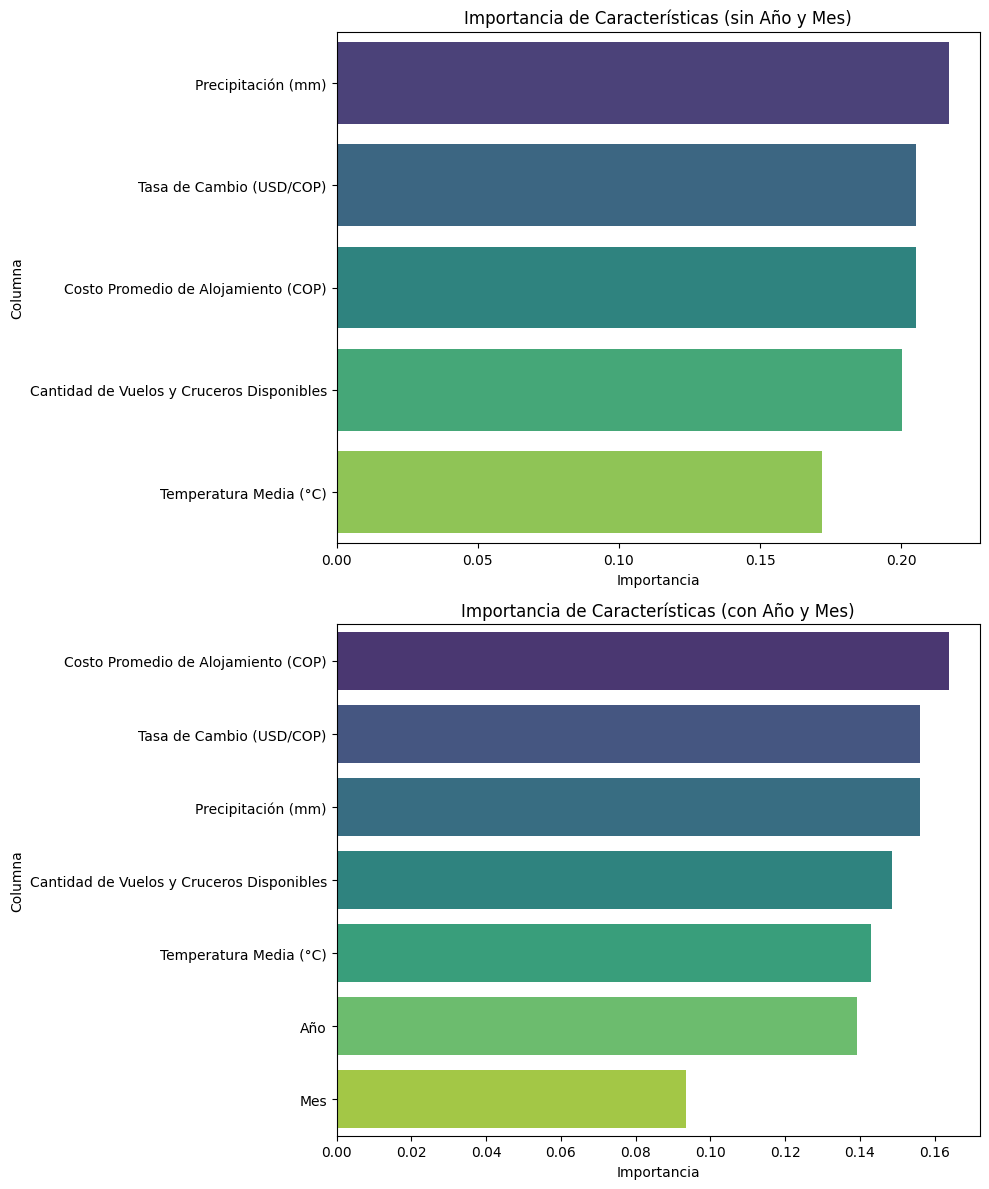

In [28]:
# Obtener importancias del primer clasificador
importancias_1 = clf_1.feature_importances_
nombres_columnas_1 = Xc1_train.columns
importancia_caracteristicas_1 = pd.DataFrame({'Columna': nombres_columnas_1, 'Importancia': importancias_1})
importancia_caracteristicas_1 = importancia_caracteristicas_1.sort_values('Importancia', ascending=False)

print("\nImportancia de las Características sin Año y Mes:\n", importancia_caracteristicas_1)

# Obtener importancias del segundo clasificador
importancias_2 = clf_2.feature_importances_
nombres_columnas_2 = Xc2_train.columns
importancia_caracteristicas_2 = pd.DataFrame({'Columna': nombres_columnas_2, 'Importancia': importancias_2})
importancia_caracteristicas_2 = importancia_caracteristicas_2.sort_values('Importancia', ascending=False)

print("\nImportancia de las Características con Año y Mes:\n", importancia_caracteristicas_2)

# Crear figura y ejes con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Primera gráfica
sns.barplot(ax=axes[0], x='Importancia', y='Columna', data=importancia_caracteristicas_1, 
            hue='Columna', palette="viridis", legend=False)
axes[0].set_title('Importancia de Características (sin Año y Mes)')
axes[0].set_xlabel('Importancia')
axes[0].set_ylabel('Columna')

# Segunda gráfica
sns.barplot(ax=axes[1], x='Importancia', y='Columna', data=importancia_caracteristicas_2, 
            hue='Columna', palette="viridis", legend=False)
axes[1].set_title('Importancia de Características (con Año y Mes)')
axes[1].set_xlabel('Importancia')
axes[1].set_ylabel('Columna')

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()

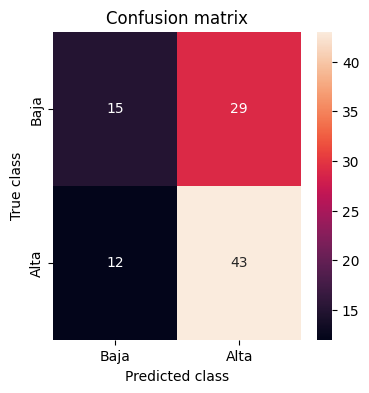

              precision    recall  f1-score   support

           0       0.56      0.34      0.42        44
           1       0.60      0.78      0.68        55

    accuracy                           0.59        99
   macro avg       0.58      0.56      0.55        99
weighted avg       0.58      0.59      0.56        99



In [29]:
from sklearn.metrics import confusion_matrix
LABELS = ['Baja', 'Alta']

conf_matrix = confusion_matrix(yc_test, yc1_test_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print (classification_report(yc_test, yc1_test_pred))

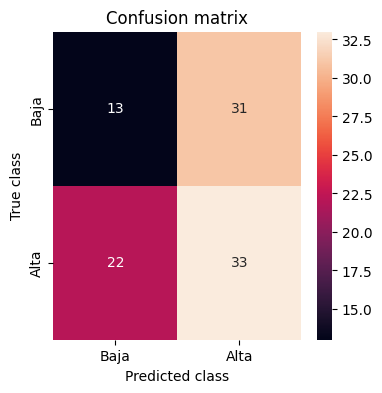

              precision    recall  f1-score   support

           0       0.37      0.30      0.33        44
           1       0.52      0.60      0.55        55

    accuracy                           0.46        99
   macro avg       0.44      0.45      0.44        99
weighted avg       0.45      0.46      0.45        99



In [30]:
conf_matrix = confusion_matrix(yc_test, yc2_test_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print (classification_report(yc_test, yc2_test_pred))

## Celdas de Resultados

### Tablas comparativas

#### Tabla comparación - Regresión

In [ ]:
# print(f'Error sin Año y Mes MAE: {mae:.2f}')
# print(f'Error con Año y Mes MAE: {mae_con:.2f}')
# print(f'\nError sin Año y Mes RMSE: {rmse:.2f}')
# print(f'Error con Año y Mes RMSE: {rmse_con:.2f}')

| **Métrica** | **Sin Año/Mes** | **Con Año/Mes** | **Mejoró?** |
|-------|-----------|--------|----------|
| **MAE** | 37270.58 | 37286.34 | No |
| **RMSE** | 42076.54 | 42102.45 | No |
| **% Error MAE** | 48.09% | 48.11% | No |
| **% Error RMSE** | 54.29% | 54.33% | No |

#### Tabla de comparación - Clasificación

In [ ]:
# print(f'Accuracy sin Año y Mes: {accuracy_score(yc_test, yc_test_pred):.2f}')
# print(f'Accuracy con Año y Mes: {accuracy_score(yc_test1, yc_test1_pred):.2f}')

# print("\nReporte de Clasificación sin Año y Mes:")
# print(classification_report(yc_test, yc_test_pred))
# print("Reporte de Clasificación con Año y Mes:")
# print(classification_report(yc_test1, yc_test1_pred))

| **Métrica** | **Sin Año/Mes** | **Con Año/Mes** | **Mejoró?** |
|-------|-----------|--------|----------|
| **Accuracy** | 0.51 | 0.55 | Si |
| **F1-score(Alta)** | 0.61 | 0.63 | Si |
| **F1-score(Baja)** | 0.31 | 0.42 | Si |
| **Precision promedio** | 0.47 | 0.53 | Si |
| **Recall promedio** | 0.48 | 0.53 | Si |

### Refexión final

1. Qué efecto tuvo la inclusión de Año y Mes en el modelo de regresión?

- En el modelo de Regresión Lineal, incluir el Año y el Mes, no representó una mejora significativa en el rendimiento.

2. Qué efecto tuvo en el modelo de clasificación?

- En el modelo de clasificación con RandomForestClassifier, incluir el Año y el Mes tuvo una ligera mejora en el accuracy de 0.51 a 0.55 y también en el F1-score en las predicciones de temporada 'Alta' y 'Baja'.

3. Por qué crees que ocurrió esa diferencia?

- En el modelo de regresión lineal no hubo diferencia debido a su limitación para encontrar algunos patrones en el Año y el Mes. Es probable también que con las otras características ya se tuviera una buena predicciåón del número de visitantes.
El modelo de clasificación RandomForesClassifier, al ser más robusto y no lineal pudo aprovechar un poco mejor los datos de Año y Mes. Adicionalmente la clasificación puede ser más sensible a valores de tiempo que la predicción nuérica en la regresión.

4. En qué tipo de problemas reales crees que Año y Mes serían especialmente útiles?

- Pueden ser útiles en problemas donde el objetivo se relaciona con la época o temporada. Algunos ejemplos podrían ser:
    - Predicción de ventas: Ver que productos se venden más en época de vacaciones.
    - Predicción de generación de energía solar: Ver en que meses del año se genera mayor cantidad de energía.
    - Predicción del clima: Predecir temporada de vientos, lluvias o sequías.

5. Qué aprendizaje te deja este ejercicio sobre el uso de variables temporales en Machine Learning?
- Las variables temporales pueden ser útiles pero su utilidad depende del contexto de uso y el modelo utilizado.
- Añadir información del tiempo, no siempre mejora el rendimiento del modelo.
- El modelo Random Forest al ser mas robusto aprovecha de mejor manera los datos temporales.
